In [47]:
import pandas as pd

# from io import StringIO
# data = StringIO("""forward 5
# down 5
# forward 8
# up 3
# down 8
# forward 2""")
# df = pd.read_csv(data, header=None, sep=' ', names=['command', 'units'])
df = pd.read_csv('data.txt', header=None, sep=' ', names=['command', 'units'])
df.head()

,command,units
0,forward,4
1,forward,6
2,down,8
3,forward,3
4,forward,9


In [48]:
# part one
position = df[df.command=='forward'].units.sum()
depth =  df[df.command=='down'].units.sum() - df[df.command=='up'].units.sum()
position * depth

1714680

In [49]:
# part two
up_units_should_be_negative = (df.command=='up') & (df.units > 0)
df.loc[up_units_should_be_negative, 'units'] = df.loc[up_units_should_be_negative, 'units'] * -1
df['aim'] = df[df.command!='forward'].units.cumsum()
df['aim'] = df.aim.ffill().fillna(0)
df['position'] = df[df.command=='forward'].units.cumsum()
df['depth'] = (df.aim[df.command=='forward'] * df.units[df.command=='forward']).cumsum()
print(df.iloc[-1].position * df.iloc[-1].depth)
df.tail()

1963088820.0


,command,units,aim,position,depth
995,down,1,872.0,NaN,NaN
996,up,-8,864.0,NaN,NaN
997,up,-4,860.0,NaN,NaN
998,down,6,866.0,NaN,NaN
999,forward,8,866.0,1980.0,991459.0


<AxesSubplot: >

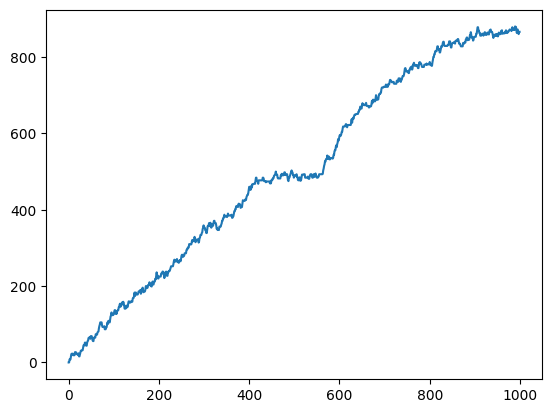

In [53]:
df.aim.plot()

<AxesSubplot: >

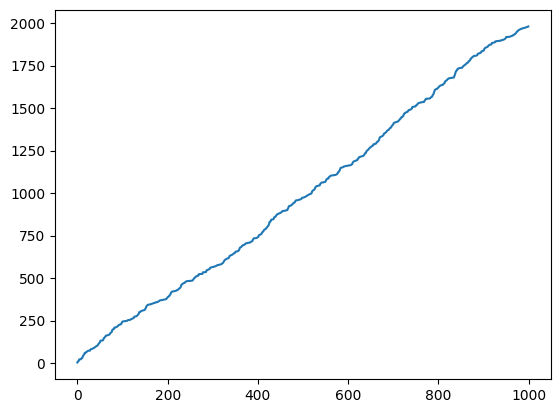

In [59]:
df.position.dropna().plot()

<AxesSubplot: >

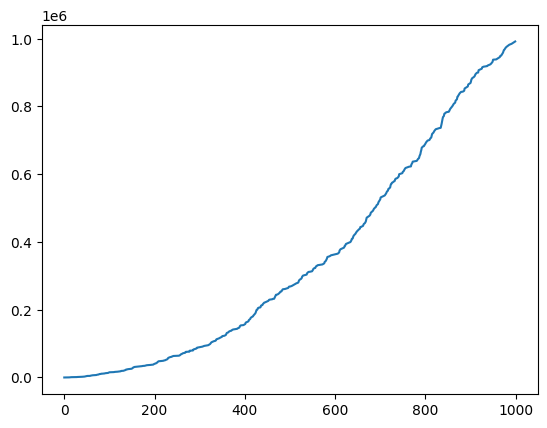

In [60]:
df.depth.dropna().plot()

<AxesSubplot: xlabel='position'>

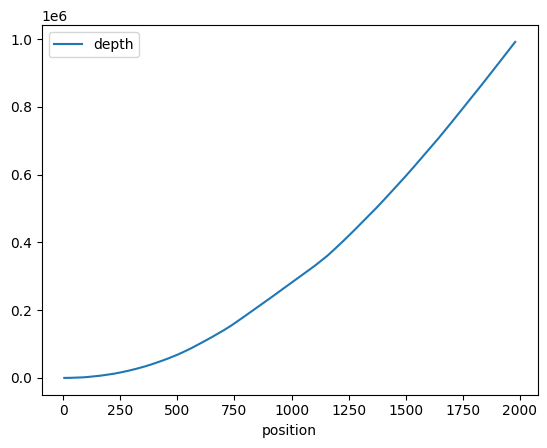

In [57]:
df.dropna().plot('position', 'depth')